In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [13]:
# load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# check the shape of the data
print(X_train.shape) # 60000 images, 28x28 pixels
print(y_train.shape) # 60000 labels, 0-9
print(X_test.shape) # 10000 images, 28x28 pixels
print(y_test.shape) # 10000 labels, 0-9

# add padding the images by 2 pixels
X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape, X_test.shape)

# normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print(X_train.min(), X_test.max())

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 32, 32, 1) (10000, 32, 32, 1)
0.0 1.0


In [15]:
# check the shape of the data
print(X_train.shape) # 60000 images, 32x32 pixels
print(X_test.shape) # 10000 images, 32x32 pixels

in_shape = X_train.shape[1:]
print(in_shape)

num_class = len(np.unique(y_train))
print(num_class)

(60000, 32, 32, 1)
(10000, 32, 32, 1)
(32, 32, 1)
10


In [16]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

model = Sequential()

# Convo2D 6-filter, 5x5 kernel, 1x1 stride, relu activation, input shape 32x32x1
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=in_shape))
# Average Pooling2D 2x2 pool size, 2x2 stride
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# Convo2D 16-filter, 5x5 kernel, 1x1 stride, relu activation
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu'))
# Average Pooling2D 2x2 pool size, 2x2 stride
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# Convo2D 120-filter, 5x5 kernel, 1x1 stride, relu activation
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='relu'))

# Flatten
model.add(Flatten())

# Fully connected, Dense 84 units, relu activation
model.add(Dense(units=84, activation='relu'))

# Output Dense 10 units (from num_class), softmax activation
model.add(Dense(units=num_class, activation='softmax'))

# summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

Epoch 1/20


2023-10-25 17:18:40.898919: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 6s 12ms/step - loss: 0.3572 - accuracy: 0.8945 - val_loss: 0.1167 - val_accuracy: 0.9637
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1018 - accuracy: 0.9683 - val_loss: 0.0630 - val_accuracy: 0.9794
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0561 - val_accuracy: 0.9809
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0489 - val_accuracy: 0.9842
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 8/20

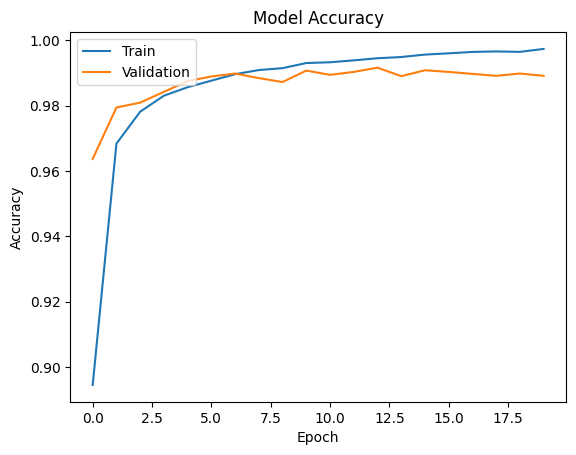

In [17]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, validation_data=(X_test, y_test), verbose=1)

# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()